In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import models, layers, metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import warnings

plt.style.use('classic')
warnings.filterwarnings("ignore")

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 25

# One-Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print("Shape of X [N, H, W, C]: ", test_images.shape)
print("Shape of y: ", test_labels.shape)

Shape of X [N, H, W, C]:  (10000, 28, 28, 1)
Shape of y:  (10000, 10)


In [3]:
def LeNet_5():
    model = models.Sequential()
    # 卷积与池化层
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation="tanh"))
    model.add(layers.MaxPooling2D((2, 2)))
    # 添加分类器
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation="tanh"))
    model.add(layers.Dense(84, activation="tanh"))
    model.add(layers.Dense(10, activation="softmax"))

    return model

LeNet_5 = LeNet_5()
LeNet_5.summary()  # 显示模型结构

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [4]:
LeNet_5.compile(optimizer=SGD(lr=0.001, momentum=0.7, nesterov=True),         # 优化器
        loss='categorical_crossentropy',  # 损失函数 
        metrics=["categorical_accuracy"])        # 评价指标

mcp_save = ModelCheckpoint('LeNet-5.h5', save_best_only=True, monitor='val_loss', mode='min')     

LeNet_history = LeNet_5.fit(train_images, train_labels, epochs=200, batch_size=128, shuffle=True, validation_split=0.35, callbacks=[mcp_save])
LeNet_train_loss, LeNet_train_acc = LeNet_5.evaluate(train_images, train_labels)
LeNet_test_loss, LeNet_test_acc = LeNet_5.evaluate(test_images, test_labels)
LeNet_pred = LeNet_5.predict(test_images)

Epoch 1/200
305/305 [==============================] - 5s 9ms/step - loss: 2.1075 - categorical_accuracy: 0.3521 - val_loss: 1.8100 - val_categorical_accuracy: 0.5677
Epoch 2/200
305/305 [==============================] - 2s 8ms/step - loss: 1.4597 - categorical_accuracy: 0.6815 - val_loss: 1.1368 - val_categorical_accuracy: 0.7614
Epoch 3/200
305/305 [==============================] - 2s 8ms/step - loss: 0.9443 - categorical_accuracy: 0.7934 - val_loss: 0.7754 - val_categorical_accuracy: 0.8331
Epoch 4/200
305/305 [==============================] - 2s 8ms/step - loss: 0.6962 - categorical_accuracy: 0.8399 - val_loss: 0.6067 - val_categorical_accuracy: 0.8603
Epoch 5/200
305/305 [==============================] - 2s 8ms/step - loss: 0.5704 - categorical_accuracy: 0.8642 - val_loss: 0.5136 - val_categorical_accuracy: 0.8754
Epoch 6/200
305/305 [==============================] - 2s 8ms/step - loss: 0.4943 - categorical_accuracy: 0.8787 - val_loss: 0.4534 - val_categorical_accuracy: 0.885

In [5]:
def CNN():
    model = models.Sequential()
    # 添加卷积与池化层
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    # 添加分类器
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model
    
CNN = CNN()
CNN.summary()  # 显示模型结构   

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [6]:
CNN.compile(optimizer=SGD(lr=0.001, momentum=0.7, nesterov=True),         # 优化器
      loss='categorical_crossentropy',  # 损失函数 
      metrics=["categorical_accuracy"])        # 评价指标

mcp_save = ModelCheckpoint('CNN.h5', save_best_only=True, monitor='val_loss', mode='min')  

CNN_history = CNN.fit(train_images, train_labels, epochs=200, batch_size=128, shuffle=True, validation_split=0.35, callbacks=[mcp_save])
CNN_train_loss, CNN_train_acc = CNN.evaluate(train_images, train_labels)
CNN_test_loss, CNN_test_acc = CNN.evaluate(test_images, test_labels)
CNN_pred = CNN.predict(test_images)

Epoch 1/200
305/305 [==============================] - 5s 14ms/step - loss: 2.2487 - categorical_accuracy: 0.2928 - val_loss: 2.1801 - val_categorical_accuracy: 0.4993
Epoch 2/200
305/305 [==============================] - 4s 12ms/step - loss: 1.9519 - categorical_accuracy: 0.5742 - val_loss: 1.5093 - val_categorical_accuracy: 0.7123
Epoch 3/200
305/305 [==============================] - 4s 12ms/step - loss: 0.9483 - categorical_accuracy: 0.7746 - val_loss: 0.5961 - val_categorical_accuracy: 0.8420
Epoch 4/200
305/305 [==============================] - 4s 14ms/step - loss: 0.5001 - categorical_accuracy: 0.8616 - val_loss: 0.4261 - val_categorical_accuracy: 0.8781
Epoch 5/200
305/305 [==============================] - 4s 12ms/step - loss: 0.3885 - categorical_accuracy: 0.8891 - val_loss: 0.3517 - val_categorical_accuracy: 0.8957
Epoch 6/200
305/305 [==============================] - 4s 14ms/step - loss: 0.3351 - categorical_accuracy: 0.9017 - val_loss: 0.3102 - val_categorical_accuracy:

In [9]:
def plot_metric(model="LeNet-5"):
    if model=="LeNet-5":
        history = LeNet_history
    else:
        history = CNN_history

    train_acc, train_mse = history.history['categorical_accuracy'], history.history['loss']
    val_acc, val_mse = history.history['val_categorical_accuracy'], history.history['val_loss']
    epochs = range(1, len(train_acc) + 1)

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

    # 准确率图
    axes[0].plot(epochs, train_acc, label='train_acc')
    axes[0].plot(epochs, val_acc, label='val_acc')
    axes[0].set_title('Training and validation accuracy of ' + model)
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend(loc='lower right')
    axes[0].grid(axis="y")
    axes[0].grid(axis="x")

    # 损失函数图
    axes[1].plot(epochs, train_mse, label='train_loss')
    axes[1].plot(epochs, val_mse, label='val_loss')
    axes[1].set_title('Training and validation loss of ' + model)
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Loss")
    axes[1].legend(loc='upper right')
    axes[1].grid(axis="y")
    axes[1].grid(axis="x")

    plt.show()

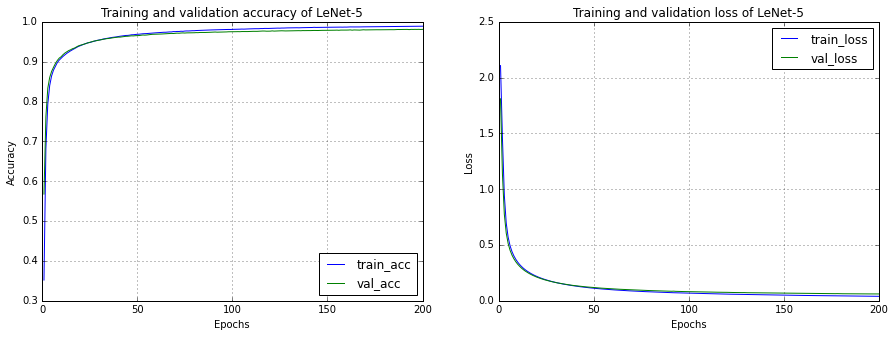

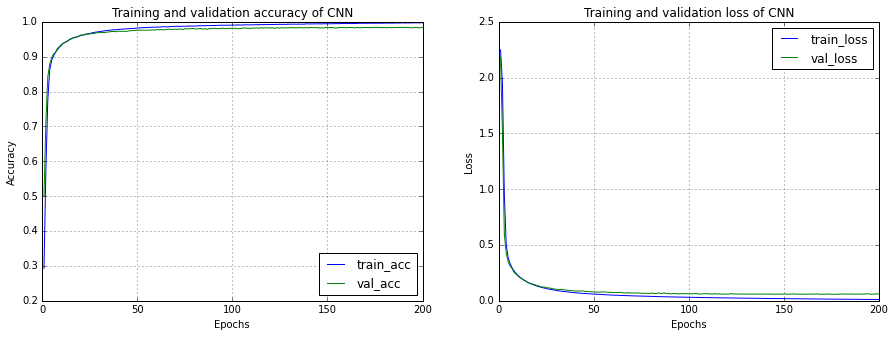

In [10]:
plot_metric('LeNet-5')
plot_metric('CNN')

In [11]:
print('============================================================\n============================================================')
print(f"LeNet-5 train_loss: {LeNet_train_loss:>8f}, LeNet-5 train_accuracy: {LeNet_train_acc:>0.3f}% \n")
print(f"LeNet-5 test_loss: {LeNet_test_loss:>8f}, LeNet-5 test_accuracy: {LeNet_test_acc:>0.3f}% \n")

print('============================================================\n============================================================')
print(f"CNN train_loss: {CNN_train_loss:>8f}, CNN train_accuracy: {CNN_train_acc:>0.3f}% \n")
print(f"CNN test_loss: {CNN_test_loss:>8f}, CNN test_accuracy: {CNN_test_acc:>0.3f}% \n")

LeNet-5 train_loss: 0.047393, LeNet-5 train_accuracy: 0.986% 

LeNet-5 test_loss: 0.156034, LeNet-5 test_accuracy: 0.952% 

CNN train_loss: 0.027762, CNN train_accuracy: 0.993% 

CNN test_loss: 0.318460, CNN test_accuracy: 0.988% 



In [12]:
LeNet_pred_, CNN_pred_ = np.rint(LeNet_pred), np.rint(CNN_pred)

print("=====================LeNet-5 Classification Report=====================")
print(classification_report(test_labels, LeNet_pred_))
print("=======================CNN Classification Report=======================")
print(classification_report(test_labels, CNN_pred_))

=====================LeNet-5 Classification Report=====================
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       980
           1       0.99      0.96      0.98      1135
           2       0.88      0.98      0.93      1032
           3       0.93      0.98      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.96      0.95      0.95      1028
           8       0.98      0.86      0.92       974
           9       0.97      0.89      0.93      1009

   micro avg       0.96      0.95      0.95     10000
   macro avg       0.96      0.95      0.95     10000
weighted avg       0.96      0.95      0.95     10000
 samples avg       0.95      0.95      0.95     10000

=======================CNN Classification Report=======================
              precision    recall  f1-score

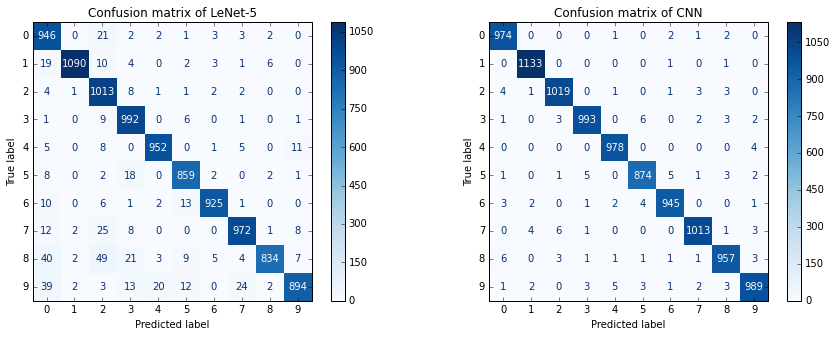

In [13]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# 生成混淆矩阵
LeNet_cm = confusion_matrix(test_labels.argmax(1), LeNet_pred_.argmax(1)) 
CNN_cm = confusion_matrix(test_labels.argmax(1), CNN_pred_.argmax(1))
# 绘制混淆矩阵
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
axes[0].set_title('Confusion matrix of LeNet-5')
axes[1].set_title('Confusion matrix of CNN')
ConfusionMatrixDisplay(LeNet_cm, display_labels=labels).plot(cmap=plt.cm.Blues, ax=axes[0])
ConfusionMatrixDisplay(CNN_cm, display_labels=labels).plot(cmap=plt.cm.Blues, ax=axes[1])